
# Лабораторна робота №6 (варіант 6)

**Мета роботи:** отримати базові знання та навички по роботі з бібліотекою
Matplotlib. 

Система рівнянь прямих:

\[
\begin{cases}
-10.3 x_1 + 10.2 x_2 = 70,\\
4.7 x_1 + 12.3 x_2 = 173,\\
13.2 x_1 + 8.8 x_2 = 282.
\end{cases}
\]


In [11]:
import numpy as np
import matplotlib.pyplot as plt


a1, b1, c1 = -10.3, 10.2, 70
a2, b2, c2 = 4.7, 12.3, 173
a3, b3, c3 = 13.2, 8.8, 282


def line1(x):
    return (c1 - a1 * x) / b1

def line2(x):
    return (c2 - a2 * x) / b2

def line3(x):
    return (c3 - a3 * x) / b3


x = np.linspace(0, 20, 400)


colors = ['magenta', 'brown', 'cyan']
linestyles = ['--', '-.', ':']


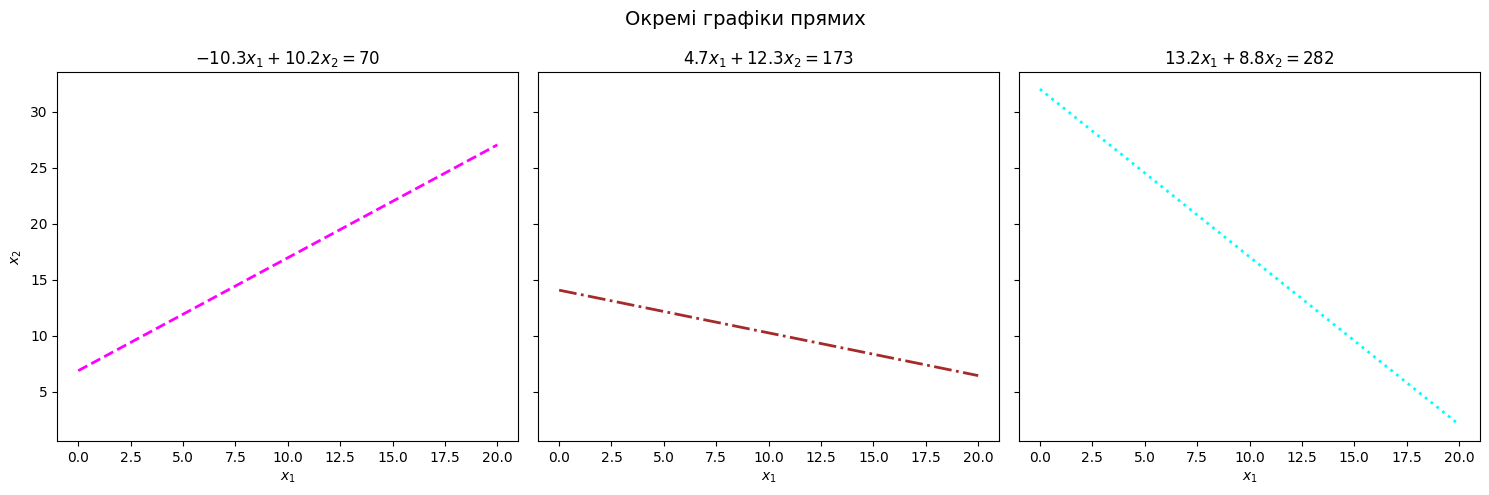

In [12]:
fig1, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5))


axes[0].plot(x, line1(x), color=colors[0], linestyle=linestyles[0], linewidth=2)
axes[0].set_title(r'$-10.3x_1 + 10.2x_2 = 70$')
axes[0].set_xlabel(r'$x_1$')
axes[0].set_ylabel(r'$x_2$')


axes[1].plot(x, line2(x), color=colors[1], linestyle=linestyles[1], linewidth=2)
axes[1].set_title(r'$4.7x_1 + 12.3x_2 = 173$')
axes[1].set_xlabel(r'$x_1$')


axes[2].plot(x, line3(x), color=colors[2], linestyle=linestyles[2], linewidth=2)
axes[2].set_title(r'$13.2x_1 + 8.8x_2 = 282$')
axes[2].set_xlabel(r'$x_1$')

fig1.suptitle('Окремі графіки прямих', fontsize=14)
fig1.tight_layout()
plt.show()


In [13]:
A1 = np.array([a1, b1])
A2 = np.array([a2, b2])
A3 = np.array([a3, b3])

def intersect(a_i, c_i, a_j, c_j):
    """Знаходить точку перетину двох прямих a_i·[x1,x2]^T = c_i, a_j·[x1,x2]^T = c_j."""
    A = np.vstack([a_i, a_j])   
    C = np.array([c_i, c_j])    
    return np.linalg.solve(A, C)

P12 = intersect(A1, c1, A2, c2)   
P13 = intersect(A1, c1, A3, c3)   
P23 = intersect(A2, c2, A3, c3)   

print("P12 (лінії 1 і 2) =", P12)
print("P13 (лінії 1 і 3) =", P13)
print("P23 (лінії 2 і 3) =", P23)


P12 (лінії 1 і 2) = [ 5.17436867 12.08784287]
P13 (лінії 1 і 3) = [10.0337358  16.99485085]
P23 (лінії 2 і 3) = [16.08429752  7.91900826]


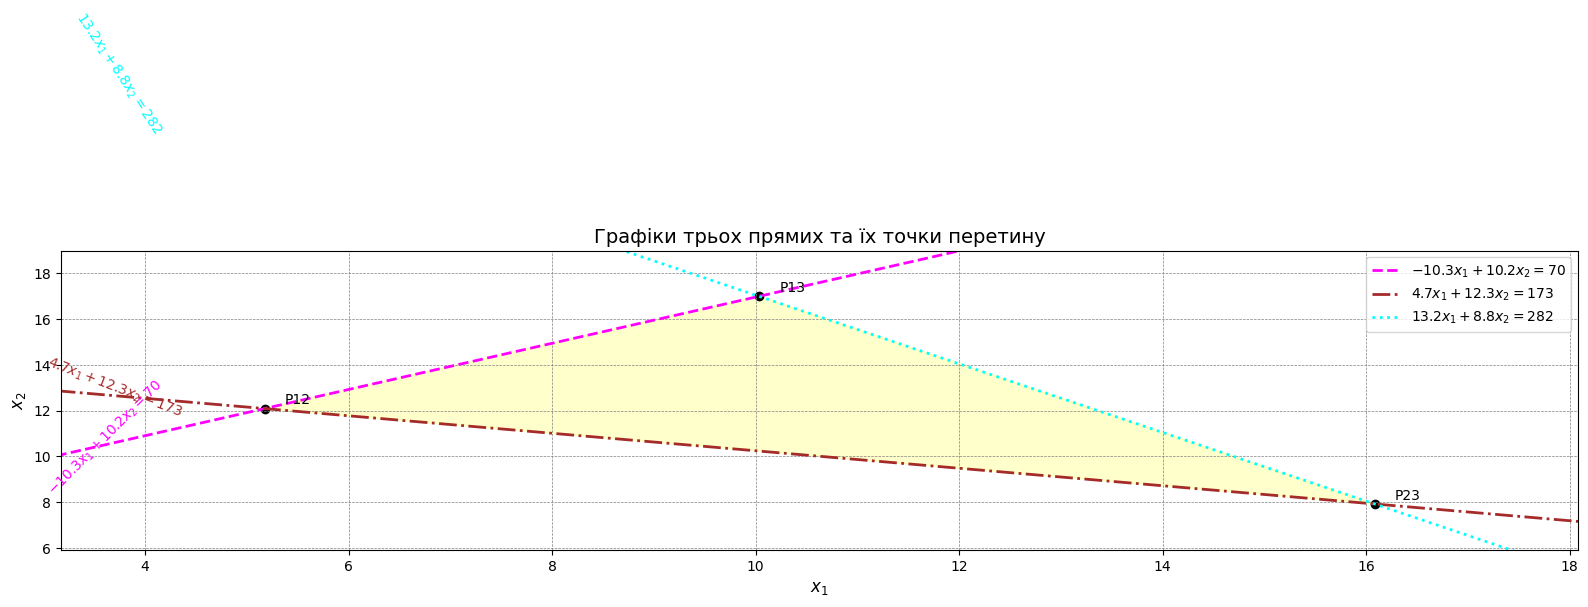

In [14]:
fig2, ax = plt.subplots(figsize=(16, 8), dpi=100)

y1 = line1(x)
y2 = line2(x)
y3 = line3(x)


ax.plot(x, y1, color=colors[0], linestyle=linestyles[0], linewidth=2,
        label=r'$-10.3x_1 + 10.2x_2 = 70$')
ax.plot(x, y2, color=colors[1], linestyle=linestyles[1], linewidth=2,
        label=r'$4.7x_1 + 12.3x_2 = 173$')
ax.plot(x, y3, color=colors[2], linestyle=linestyles[2], linewidth=2,
        label=r'$13.2x_1 + 8.8x_2 = 282$')


all_points = np.vstack([P12, P13, P23])
xmin, xmax = all_points[:, 0].min() - 2, all_points[:, 0].max() + 2
ymin, ymax = all_points[:, 1].min() - 2, all_points[:, 1].max() + 2
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)


ax.grid(True, linestyle='--', linewidth=0.5, color='gray')


ax.legend(loc='best')


ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_ylabel(r'$x_2$', fontsize=12)
ax.set_title('Графіки трьох прямих та їх точки перетину', fontsize=14)


def add_eq_label(ax, x_pos, line_func, text, a, b, color):
    y_pos = line_func(x_pos)
    slope = -a / b
    angle = np.degrees(np.arctan(slope))
    ax.text(x_pos, y_pos, text, color=color,
            fontsize=10, rotation=angle,
            rotation_mode='anchor', ha='center', va='bottom')

add_eq_label(ax, xmin + 0.5, line1,
             r'$-10.3x_1 + 10.2x_2 = 70$', a1, b1, colors[0])
add_eq_label(ax, xmin + 0.5, line2,
             r'$4.7x_1 + 12.3x_2 = 173$', a2, b2, colors[1])
add_eq_label(ax, xmin + 0.5, line3,
             r'$13.2x_1 + 8.8x_2 = 282$', a3, b3, colors[2])


poly = np.vstack([P12, P13, P23])
center = poly.mean(axis=0)
angles = np.arctan2(poly[:, 1] - center[1], poly[:, 0] - center[0])
order = np.argsort(angles)
poly_sorted = poly[order]

ax.fill(poly_sorted[:, 0], poly_sorted[:, 1],
        alpha=0.2, color='yellow', label='Область перетину')


for (x_p, y_p), name in zip([P12, P13, P23], ['P12', 'P13', 'P23']):
    ax.scatter(x_p, y_p, color='black')
    ax.text(x_p + 0.2, y_p + 0.2, name, fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [15]:
fig1.savefig('separate_lines.jpg')
fig1.savefig('separate_lines.png')
fig1.savefig('separate_lines.svg')

fig2.savefig('all_lines.jpg')
fig2.savefig('all_lines.png')
fig2.savefig('all_lines.svg')
